In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Sig_Eqs = pd.read_csv(r"D:\Jupyter Notebook\earthquakes-2023-11-07.tsv", delimiter='\t')


total_deaths_by_country = Sig_Eqs.groupby('Country').sum()['Deaths'].sort_values(ascending=False)
top_ten_countries_deaths = total_deaths_by_country.head(10)
print("Top ten countries by total earthquake-related deaths:")
print(top_ten_countries_deaths)

Top ten countries by total earthquake-related deaths:
Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


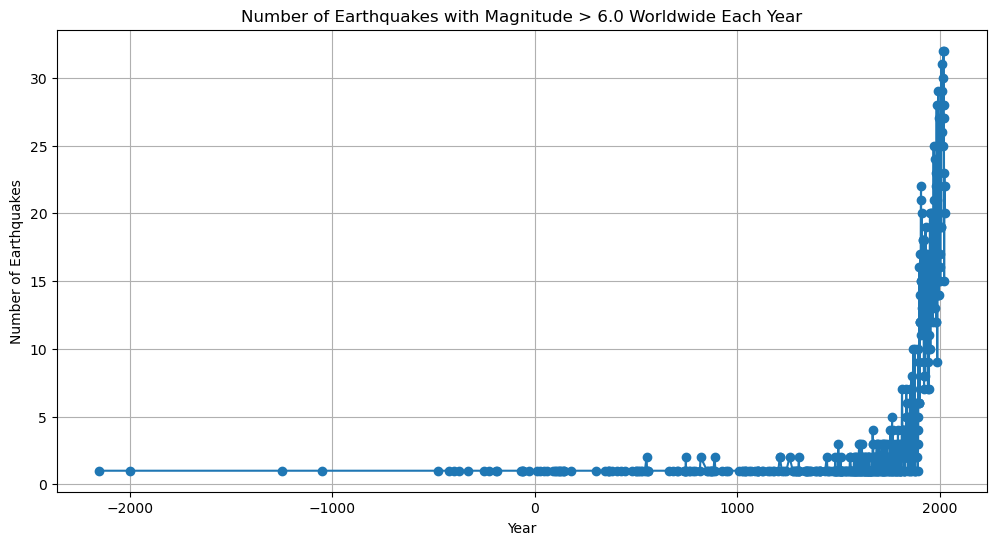

In [3]:
large_earthquakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

earthquakes_per_year = large_earthquakes['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
earthquakes_per_year.plot(kind='line', marker='o', linestyle='-')
plt.title("Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True)
plt.show()

In [4]:
def CountEq_LargestEq(data, country):
    country_data = data[data['Country'] == country]
    
    total_earthquakes = len(country_data)
    
    if total_earthquakes > 0:
        largest_earthquake = country_data[country_data['Mag'] == country_data['Mag'].max()]
        if not largest_earthquake.empty:
            largest_earthquake_year = largest_earthquake['Year'].values[0]
            
            if not pd.isna(largest_earthquake['Mo'].values[0]) and not pd.isna(largest_earthquake['Dy'].values[0]):
                largest_earthquake_month = int(largest_earthquake['Mo'].values[0])
                largest_earthquake_day = int(largest_earthquake['Dy'].values[0])
                largest_earthquake_date = f"{largest_earthquake_year}-{largest_earthquake_month:02d}-{largest_earthquake_day:02d}"
            else:
                largest_earthquake_date = "Date Unknown"
        else:
            largest_earthquake_date = "Date Unknown"
    else:
        largest_earthquake_date = None
    
    return total_earthquakes, largest_earthquake_date

unique_countries = Sig_Eqs['Country'].unique()

results = {}

for country in unique_countries:
    total_earthquakes, largest_earthquake_date = CountEq_LargestEq(Sig_Eqs, country)
    results[country] = {'Total Earthquakes': total_earthquakes, 'Date of Largest Earthquake': largest_earthquake_date}

sorted_results = sorted(results.items(), key=lambda x: x[1]['Total Earthquakes'], reverse=True)

print("1.3 Total number of earthquakes and date of the largest earthquake by country:")
for country, result in sorted_results:
    print(f"Country: {country}, Total Earthquakes: {result['Total Earthquakes']}, Date of Largest Earthquake: {result['Date of Largest Earthquake']}")

1.3 Total number of earthquakes and date of the largest earthquake by country:
Country: CHINA, Total Earthquakes: 620, Date of Largest Earthquake: 1668.0-07-25
Country: JAPAN, Total Earthquakes: 414, Date of Largest Earthquake: 2011.0-03-11
Country: INDONESIA, Total Earthquakes: 411, Date of Largest Earthquake: 2004.0-12-26
Country: IRAN, Total Earthquakes: 384, Date of Largest Earthquake: 856.0-12-22
Country: TURKEY, Total Earthquakes: 335, Date of Largest Earthquake: 1939.0-12-26
Country: ITALY, Total Earthquakes: 331, Date of Largest Earthquake: 1915.0-01-13
Country: USA, Total Earthquakes: 276, Date of Largest Earthquake: 1964.0-03-28
Country: GREECE, Total Earthquakes: 270, Date of Largest Earthquake: 365.0-07-21
Country: PHILIPPINES, Total Earthquakes: 224, Date of Largest Earthquake: 1897.0-09-21
Country: MEXICO, Total Earthquakes: 209, Date of Largest Earthquake: 1899.0-01-24
Country: CHILE, Total Earthquakes: 198, Date of Largest Earthquake: 1960.0-05-22
Country: PERU, Total E

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5588\505290023.py:5: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("2281305.csv")


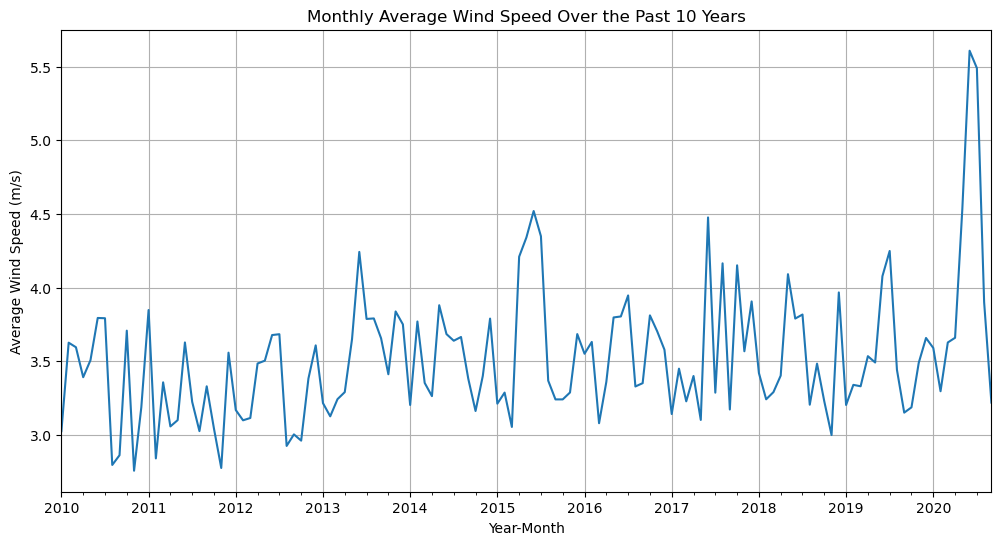

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("2281305.csv")

data['Wind_Speed'] = data['WND'].str.split(',').str[3].astype(float) / 10.0

data['Year_Month'] = pd.to_datetime(data['DATE']).dt.to_period('M')

data = data[(data['Wind_Speed'] != 999.9) & (data['WND'].str.split(',').str[1] == '1')]

monthly_avg_wind_speed = data.groupby('Year_Month')['Wind_Speed'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_wind_speed.plot()
plt.title("Monthly Average Wind Speed Over the Past 10 Years")
plt.xlabel("Year-Month")
plt.ylabel("Average Wind Speed (m/s)")
plt.grid(True)
plt.show()


C:\Users\jiaji\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


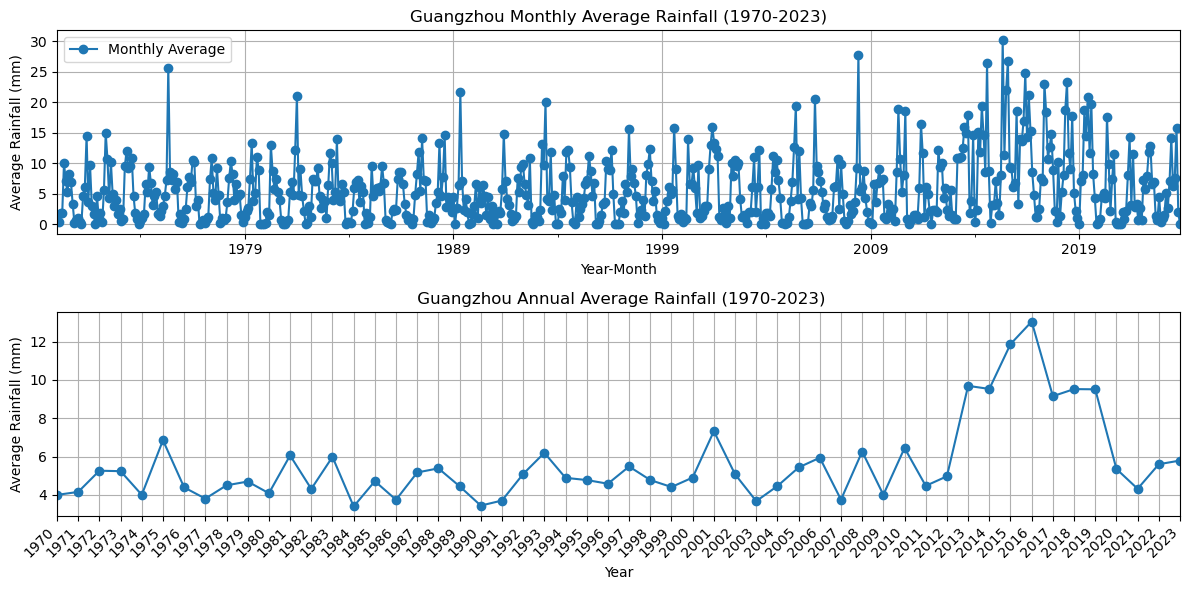

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("3510102.xlsx")
df = df.dropna()
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['PRCP'] = df['PRCP'] * 25.4
df['YearMonth'] = df['DATE'].dt.to_period('M')
monthly_avg = df.groupby('YearMonth')['PRCP'].mean()
annual_avg = monthly_avg.groupby(monthly_avg.index.year).mean()
annual_avg.index = pd.to_datetime(annual_avg.index, format='%Y')
plt.figure(figsize=(12, 6))
plt.subplot(211)
monthly_avg.plot(kind='line', marker='o', linestyle='-', label='Monthly Average')
plt.title("Guangzhou Monthly Average Rainfall (1970-2023)")
plt.xlabel("Year-Month")
plt.ylabel("Average Rainfall (mm)")
plt.grid(True)
plt.legend()

plt.subplot(212)
annual_avg.plot(kind='line', marker='o', linestyle='-')
plt.title(" Guangzhou Annual Average Rainfall (1970-2023)")
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm)")

years = annual_avg.index.year
plt.xticks(range(len(years)), years)
plt.xticks(rotation=45, ha='right') 
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
max_month = monthly_avg.idxmax()
min_month = monthly_avg.idxmin()

max_year = annual_avg.idxmax().year
min_year = annual_avg.idxmin().year

print(f"Month with the highest average precipitation: {max_month.strftime('%B %Y')}")
print(f"Month with the lowest average precipitation: {min_month.strftime('%B %Y')}")
print(f"Year with the highest average precipitation: {max_year}")
print(f"Year with the lowest average precipitation: {min_year}")

Month with the highest average precipitation: May 2015
Month with the lowest average precipitation: December 1973
Year with the highest average precipitation: 2016
Year with the lowest average precipitation: 1984


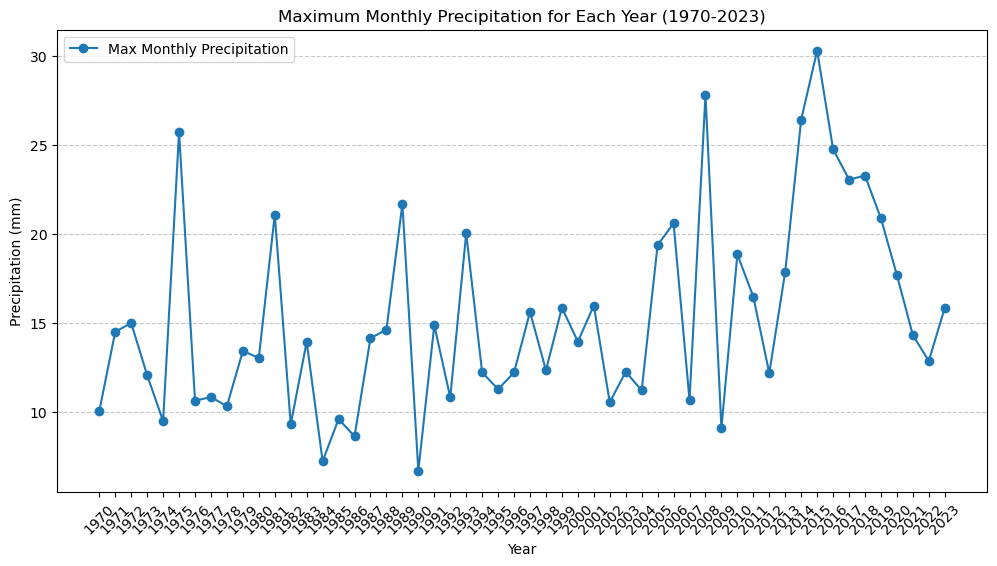

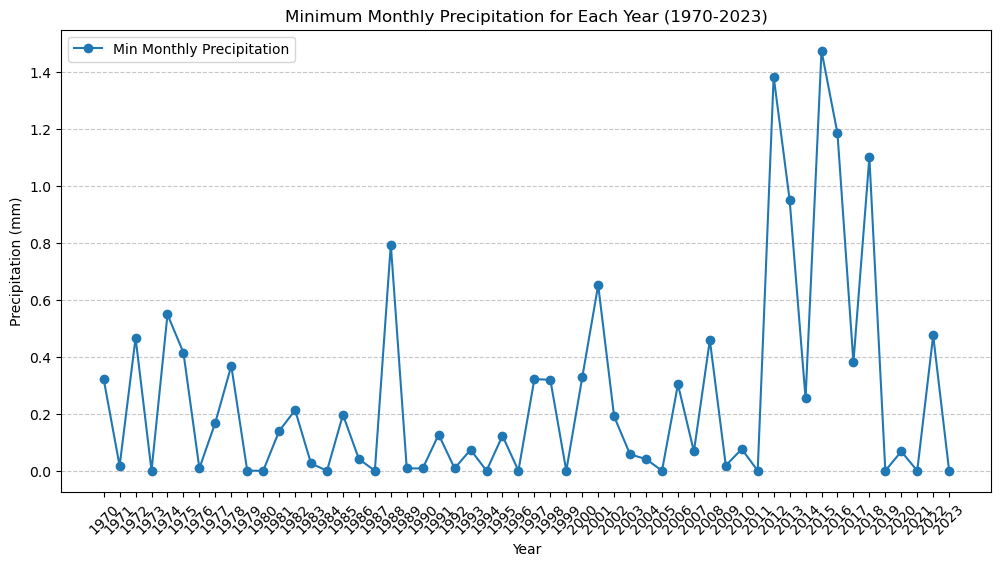

In [18]:
min_monthly_precip = monthly_avg.groupby(monthly_avg.index.year).min()
max_monthly_precip = monthly_avg.groupby(monthly_avg.index.year).max()

plt.figure(figsize=(12, 6))
plt.plot(max_monthly_precip.index, max_monthly_precip, label='Max Monthly Precipitation', marker='o', linestyle='-')
plt.title("Maximum Monthly Precipitation for Each Year (1970-2023)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.xticks(max_monthly_precip.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(min_monthly_precip.index, min_monthly_precip, label='Min Monthly Precipitation', marker='o', linestyle='-')
plt.title("Minimum Monthly Precipitation for Each Year (1970-2023)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.xticks(min_monthly_precip.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()